In [2]:
df <- read.table("snp_info_filtered.txt", header = TRUE, sep = "\t") # Adjust sep as needed
write.csv(df, "snp_info_filtered.csv", row.names = FALSE)


In [3]:
df1 <- read.csv("snp_info_filtered.csv")
df2 <- read.csv("pvalues_MinP_filtered.csv")
df_merged <- cbind(df1, df2)
write.csv(df_merged, "white_SNPs_filtered.csv", row.names = FALSE)


In [4]:
nose_segments <- c(2, 5, 10, 11, 20, 21, 22, 23, 40, 41, 42, 43, 44, 45, 46, 47)
jaw_segments  <- c(6, 13, 27, 54, 55, 26, 53, 52, 12, 24, 25, 50, 51, 48, 49)
all_segments <- c(nose_segments, jaw_segments)

keep_cols <- paste0("segment_", all_segments)

# Also keep columns that are NOT segment columns
cols_to_keep <- c(setdiff(colnames(df_merged), colnames(df_merged)[grepl("^segment_", colnames(df_merged))]), keep_cols)
cols_to_keep <- cols_to_keep[cols_to_keep %in% colnames(df_merged)] # Only keep existing

df_merged <- df_merged[, cols_to_keep]



In [6]:
df_merged <- df_merged[, -c(4:7)]

In [7]:
write.csv(df_merged, "white_SNPs_filtered_nose_jaw.csv", row.names = FALSE)


In [9]:
df_merged$CHR_POS_RS <- paste(df_merged$CHR, df_merged$POS, df_merged$RS, sep = "_")
df_merged <- df_merged[, c("CHR_POS_RS", setdiff(names(df_merged), c("CHR", "POS", "RS", "CHR_POS_RS")))]


In [10]:
write.csv(df_merged, "white_SNPs_filtered_nose_jaw.csv", row.names = FALSE)

In [12]:
library(dplyr)

nose_segments <- c(2, 5, 10, 11, 20, 21, 22, 23, 40, 41, 42, 43, 44, 45, 46, 47)
jaw_segments  <- c(6, 13, 27, 54, 55, 26, 53, 52, 12, 24, 25, 50, 51, 48, 49)

# Function to get column names matching segments
get_segment_cols <- function(segments, prefix = "segment_") {
  paste0(prefix, segments)
}

# Example: Assuming your data frame is df and segment columns are named "segment_x"
nose_cols <- get_segment_cols(nose_segments)
jaw_cols  <- get_segment_cols(jaw_segments)

# Ensure only columns present in df are selected
nose_cols <- nose_cols[nose_cols %in% colnames(df_merged)]
jaw_cols  <- jaw_cols[jaw_cols %in% colnames(df_merged)]

# Summarize p-values per row
df_merged <-df_merged %>%
  rowwise() %>%
  mutate(
    nose_p_max = max(c_across(all_of(nose_cols)), na.rm = TRUE),
    jaw_p_max  = max(c_across(all_of(jaw_cols)), na.rm = TRUE),
    nose_p_min = min(c_across(all_of(nose_cols)), na.rm = TRUE),
    jaw_p_min  = min(c_across(all_of(jaw_cols)), na.rm = TRUE),
    nose_p_mean = mean(c_across(all_of(nose_cols)), na.rm = TRUE),
    jaw_p_mean  = mean(c_across(all_of(jaw_cols)), na.rm = TRUE),
    nose_p_geom_mean = exp(mean(log(c_across(all_of(nose_cols))), na.rm = TRUE)),
    jaw_p_geom_mean  = exp(mean(log(c_across(all_of(jaw_cols))), na.rm = TRUE))
  ) %>%
  ungroup()


In [13]:
df_merged

CHR_POS_RS,segment_2,segment_5,segment_10,segment_11,segment_20,segment_21,segment_22,segment_23,segment_40,⋯,segment_48,segment_49,nose_p_max,jaw_p_max,nose_p_min,jaw_p_min,nose_p_mean,jaw_p_mean,nose_p_geom_mean,jaw_p_geom_mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1_3251975_rs4648477,3.143403e-20,9.988494e-20,1.485252e-07,1.070533e-19,7.440464e-08,0.0014242952,5.607897e-16,1.661499e-17,6.468447e-07,⋯,0.4305266,0.1386437,0.005060577,0.6728217,3.143403e-20,0.010992589,0.0004059927,0.2188768,9.805760e-12,0.1342106
1_3252007_rs4648478,5.067573e-20,2.244916e-19,1.842892e-07,2.446809e-19,6.689598e-08,0.0018689600,6.329946e-16,3.747141e-17,6.483358e-07,⋯,0.4411639,0.1228853,0.004970499,0.6354772,5.067573e-20,0.010979941,0.0004285733,0.2138441,1.407667e-11,0.1321194
1_3252781_rs10797388,1.807590e-19,2.392765e-19,1.175980e-07,2.371374e-19,8.968091e-08,0.0026983607,7.647157e-15,2.911387e-16,1.368044e-06,⋯,0.4411639,0.1680351,0.002698361,0.5177260,1.807590e-19,0.016173351,0.0003169890,0.2387677,3.416007e-11,0.1770435
1_3253703_rs10909933,1.413839e-20,8.450842e-20,5.170113e-08,4.775293e-20,3.243396e-08,0.0005072242,2.955289e-16,7.131814e-17,6.596294e-07,⋯,0.3998527,0.1602138,0.002137962,0.6663463,1.413839e-20,0.009366989,0.0001656969,0.2084372,7.696065e-12,0.1281012
1_3253839_rs7516137,1.260666e-20,8.685604e-20,5.310067e-08,4.199523e-20,3.315126e-08,0.0005937450,3.179069e-16,7.296255e-17,7.232692e-07,⋯,0.4211143,0.1585988,0.002262559,0.6552394,1.260666e-20,0.009097038,0.0001789368,0.2080036,8.005828e-12,0.1275459
1_3253889_rs7516150,1.138676e-19,2.203941e-19,8.394600e-08,1.886253e-19,6.795165e-08,0.0022008984,7.663021e-15,1.455459e-16,1.211156e-06,⋯,0.3933689,0.1508690,0.002200898,0.5402565,1.138676e-19,0.011473608,0.0002703520,0.2182572,2.745799e-11,0.1527285
1_3253941_rs7552331,1.741807e-20,1.186315e-19,8.885871e-08,6.643547e-20,5.787620e-08,0.0007728585,3.448260e-16,7.827084e-17,9.931160e-07,⋯,0.4283512,0.1685000,0.002475141,0.6661929,1.741807e-20,0.011895974,0.0002035163,0.2159631,1.047762e-11,0.1364269
1_3254341_rs1572038,3.592527e-20,1.894524e-19,7.466207e-08,1.179234e-19,5.548812e-08,0.0005706897,3.855671e-16,1.332601e-16,1.691609e-06,⋯,0.4416721,0.1621810,0.002743469,0.6085552,3.592527e-20,0.010959734,0.0002075655,0.2192879,1.284769e-11,0.1407084
1_3254369_rs1572037,2.643017e-22,1.273796e-21,3.431626e-08,8.070492e-22,2.188265e-08,0.0006093966,1.774598e-17,6.197264e-18,2.651551e-07,⋯,0.5477722,0.2445682,0.002464336,0.7030723,2.643017e-22,0.017729643,0.0001924477,0.2484542,1.470576e-12,0.1605265


In [14]:
write.csv(df_merged, "white_SNPs_filtered_nose_jaw_scores.csv", row.names = FALSE)

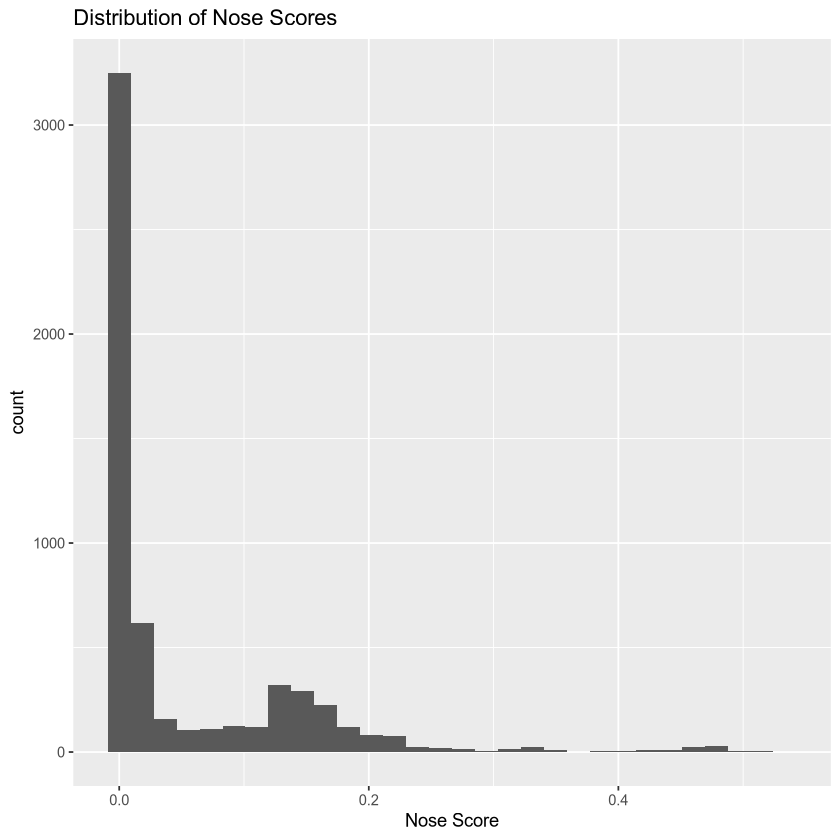

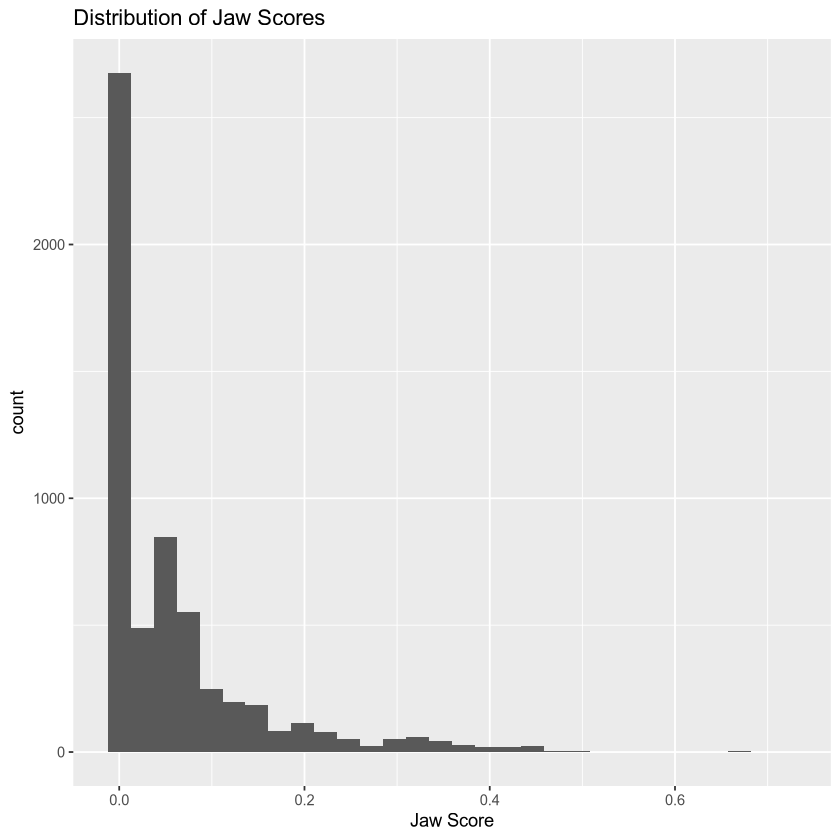

In [16]:
library(ggplot2)

# Example for geometric means
ggplot(df_merged, aes(x = nose_p_geom_mean)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Nose Scores", x = "Nose Score")

ggplot(df_merged, aes(x = jaw_p_geom_mean)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Jaw Scores", x = "Jaw Score")


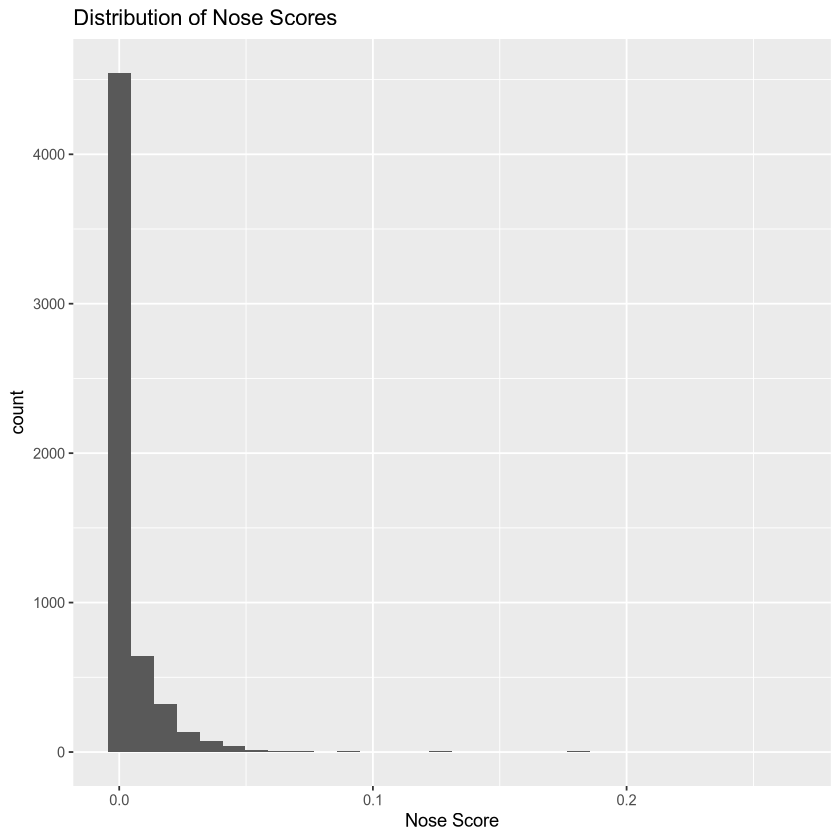

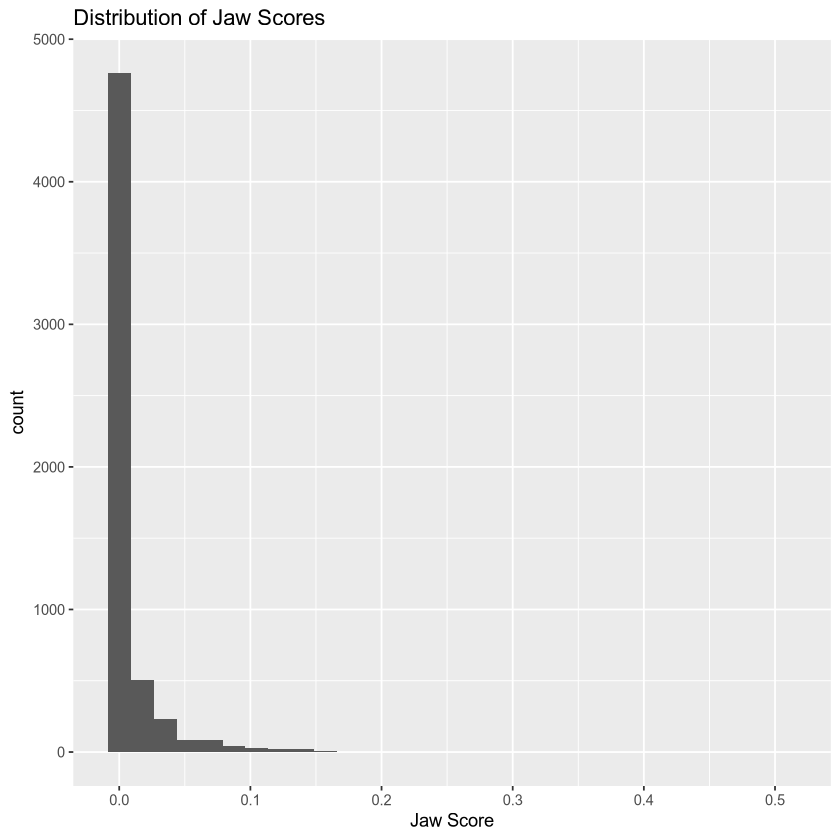

In [17]:
library(ggplot2)

# Example for geometric means
ggplot(df_merged, aes(x = nose_p_min)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Nose Scores", x = "Nose Score")

ggplot(df_merged, aes(x = jaw_p_min)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Jaw Scores", x = "Jaw Score")

In [18]:
df_merged$nose_geom_mean_logp <- -log10(df_merged$nose_p_geom_mean)
df_merged$jaw_geom_mean_logp  <- -log10(df_merged$jaw_p_geom_mean)

df_merged$nose_min_logp <- -log10(df_merged$nose_p_min)
df_merged$jaw_min_logp  <- -log10(df_merged$jaw_p_min)

df_merged$nose_avg_logp <- -log10(df_merged$nose_p_mean)
df_merged$jaw_avg_logp  <- -log10(df_merged$jaw_p_mean)

df_merged$nose_max_logp <- -log10(df_merged$nose_p_max)
df_merged$jaw_max_logp  <- -log10(df_merged$jaw_p_max)

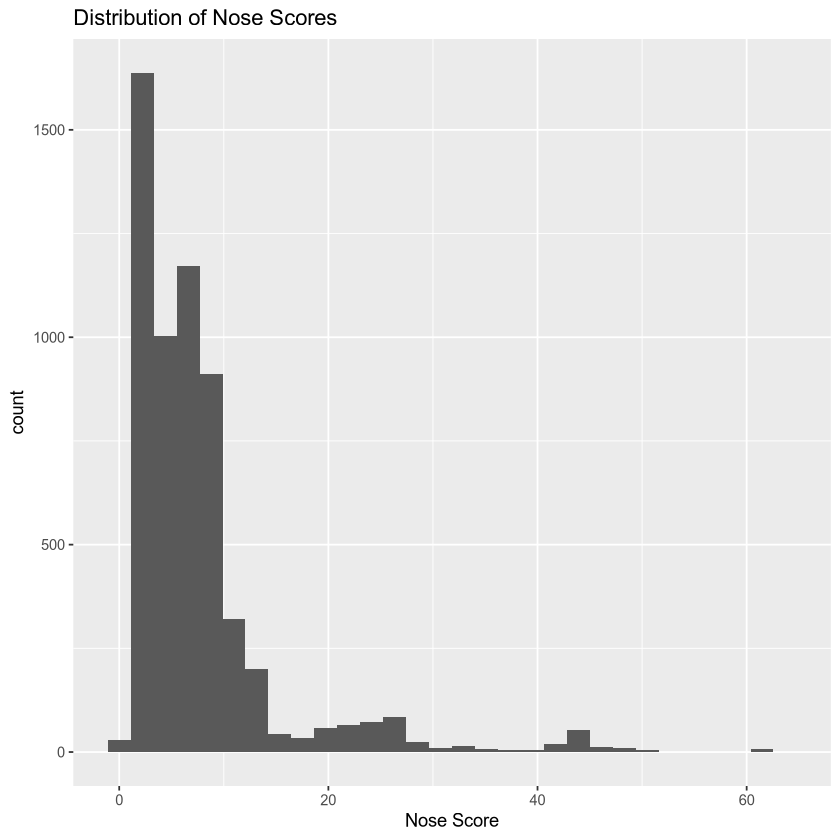

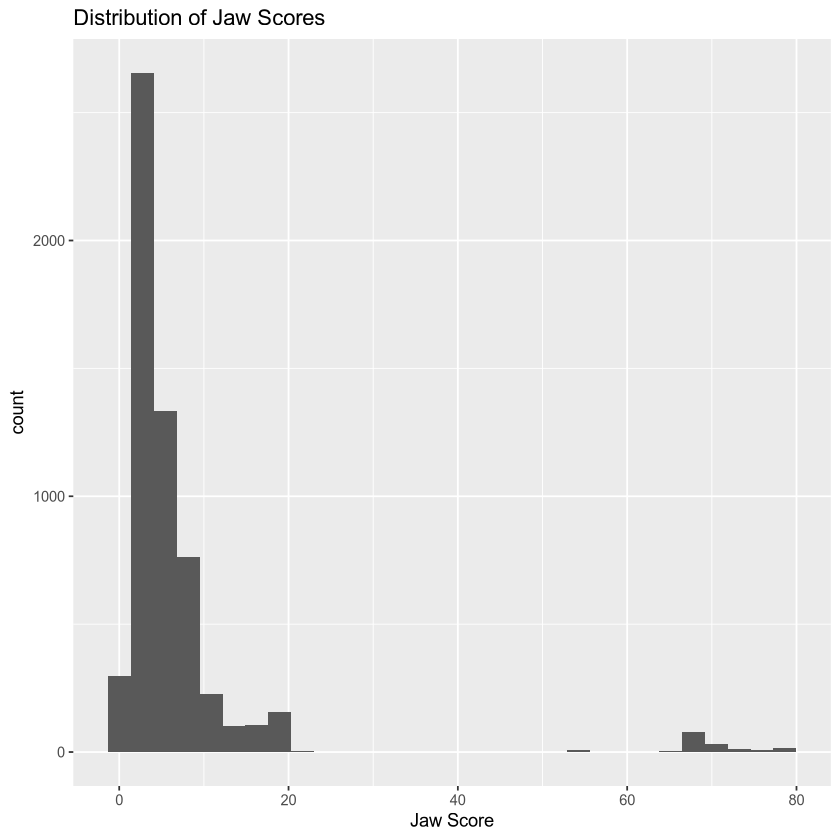

In [19]:
ggplot(df_merged, aes(x = nose_min_logp)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Nose Scores", x = "Nose Score")

ggplot(df_merged, aes(x = jaw_min_logp)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Jaw Scores", x = "Jaw Score")

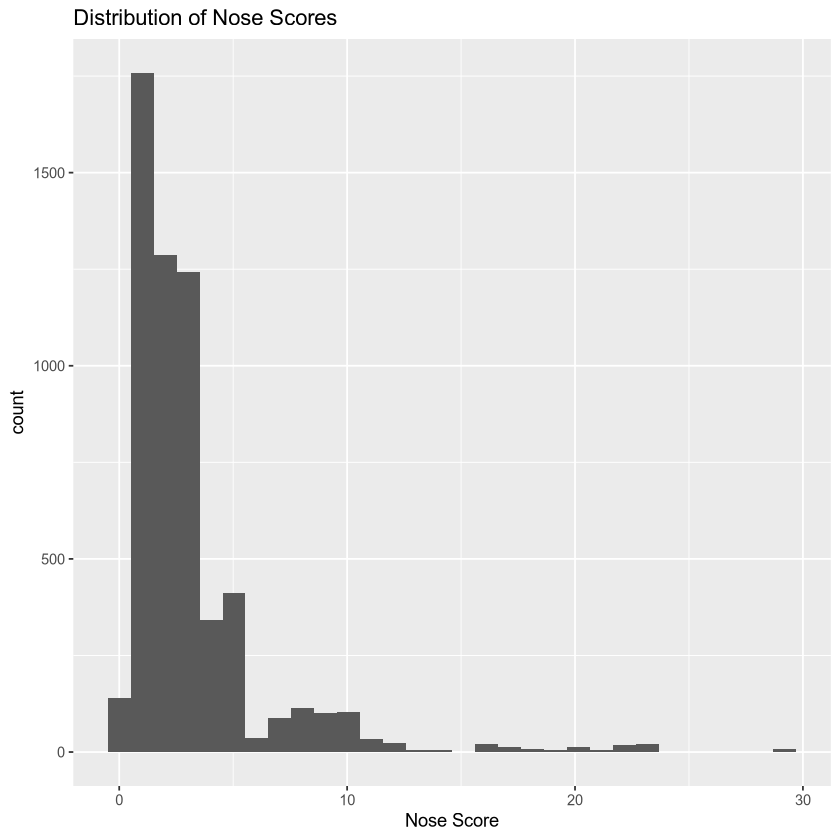

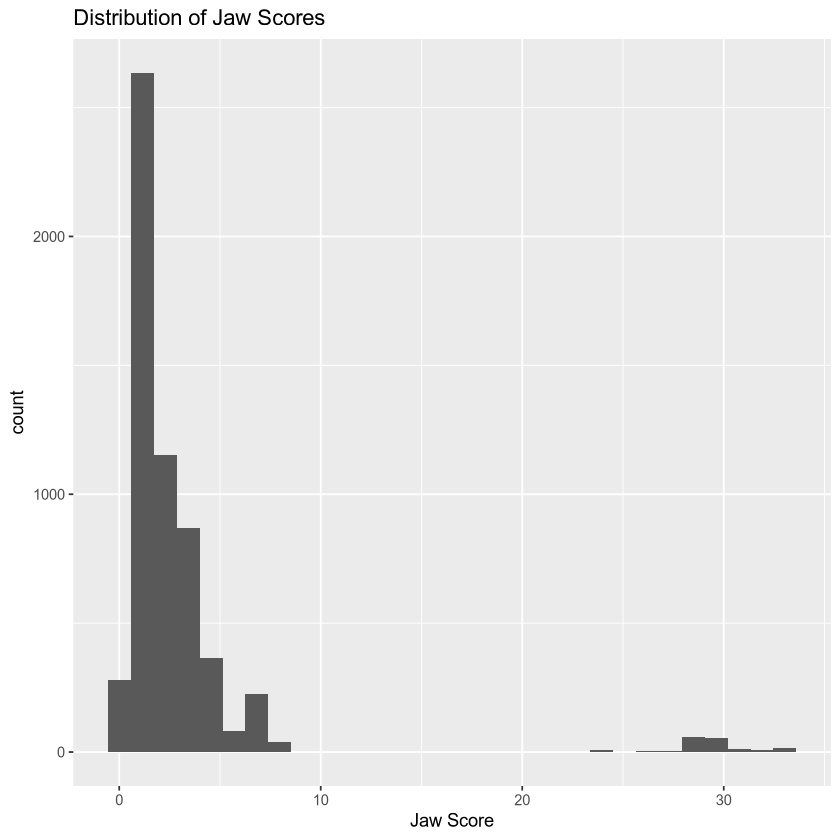

In [20]:
ggplot(df_merged, aes(x = nose_geom_mean_logp)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Nose Scores", x = "Nose Score")

ggplot(df_merged, aes(x = jaw_geom_mean_logp)) + 
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Jaw Scores", x = "Jaw Score")

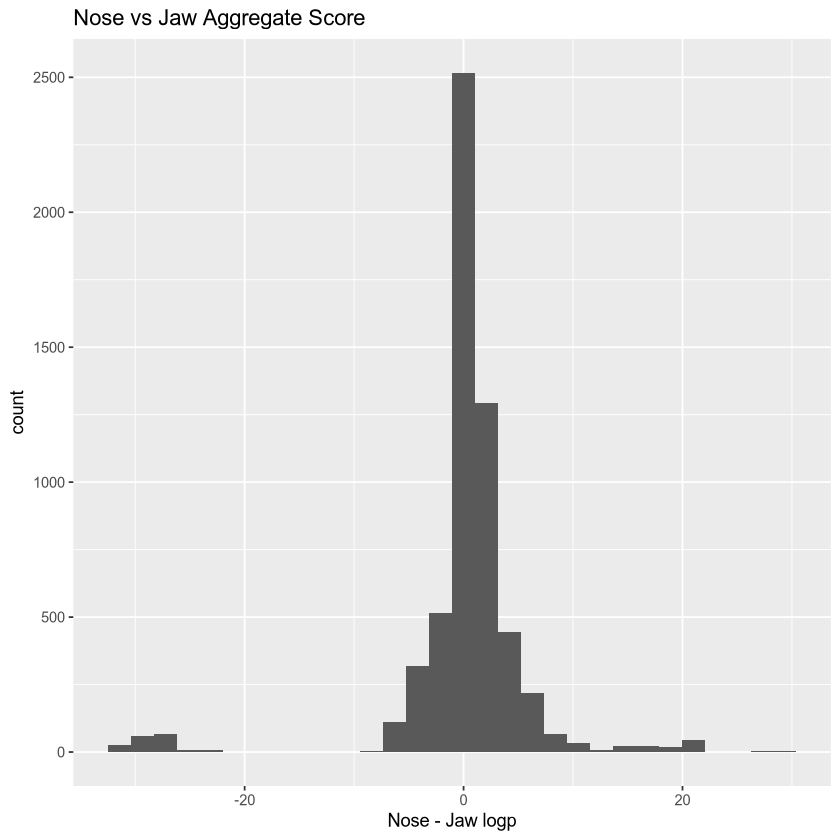

In [21]:
df_merged$nose_jaw_diff_logp_geom <- df_merged$nose_geom_mean_logp - df_merged$jaw_geom_mean_logp

# Plot the distribution
ggplot(df_merged, aes(x = nose_jaw_diff_logp_geom)) +
  geom_histogram(bins = 30) +
  labs(title = "Nose vs Jaw Aggregate Score", x = "Nose - Jaw logp")


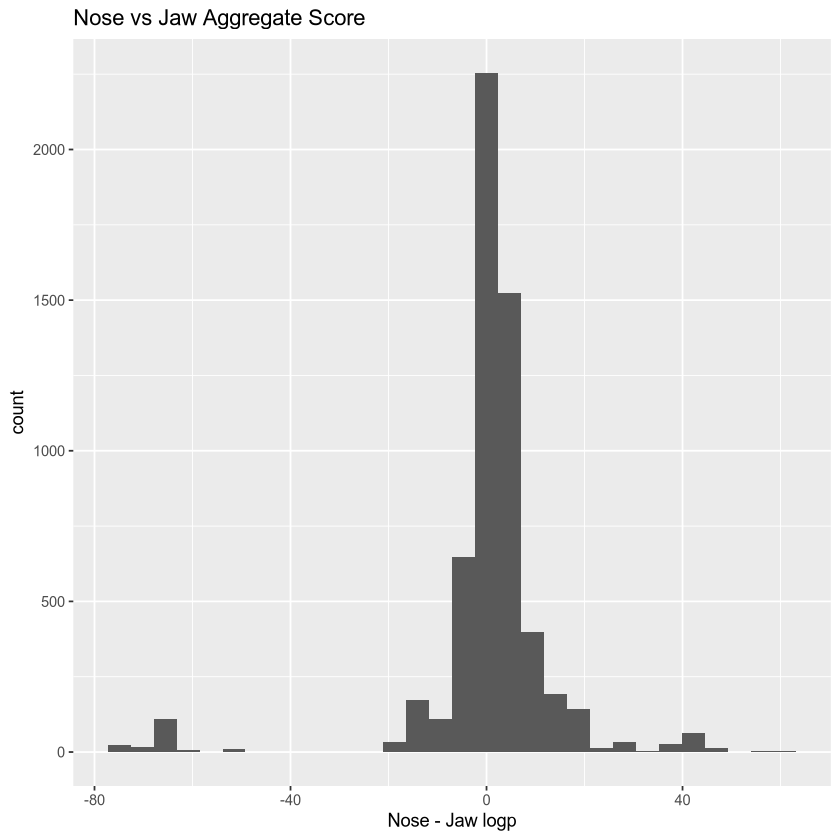

In [22]:
df_merged$nose_jaw_diff_logp_min <- df_merged$nose_min_logp - df_merged$jaw_min_logp

# Plot the distribution
ggplot(df_merged, aes(x = nose_jaw_diff_logp_min)) +
  geom_histogram(bins = 30) +
  labs(title = "Nose vs Jaw Aggregate Score", x = "Nose - Jaw logp")

In [23]:
write.csv(df_merged, "white_SNPs_filtered_nose_jaw_scores.csv", row.names = FALSE)

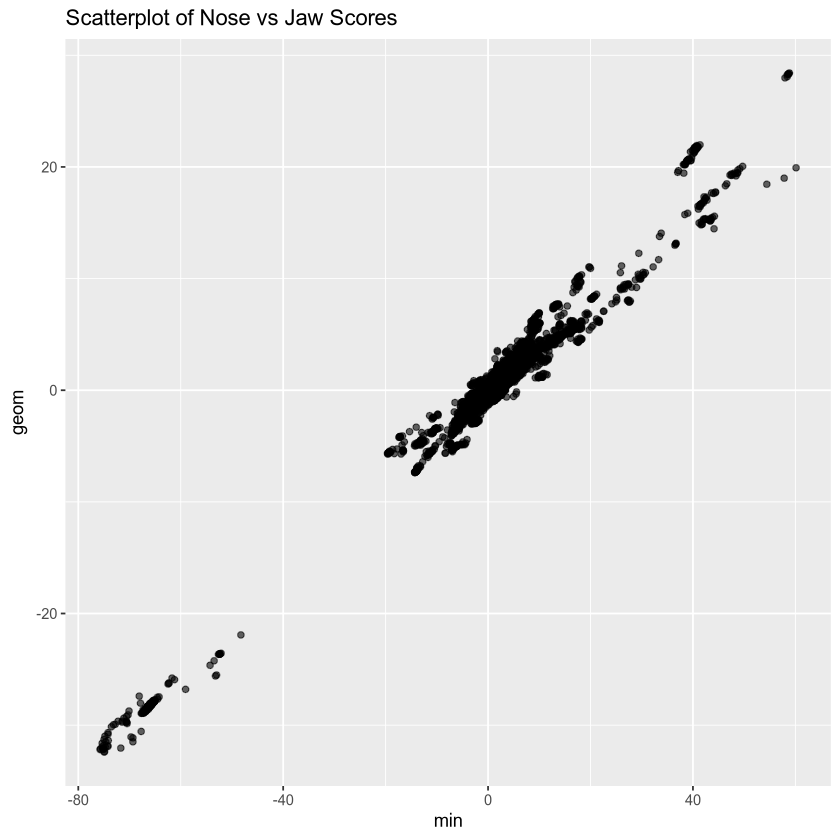

In [24]:
ggplot(df_merged, aes(x = nose_jaw_diff_logp_min, y = nose_jaw_diff_logp_geom)) +
  geom_point(alpha = 0.6) +
  labs(title = "Scatterplot of Nose vs Jaw Scores", x = "min", y = "geom")


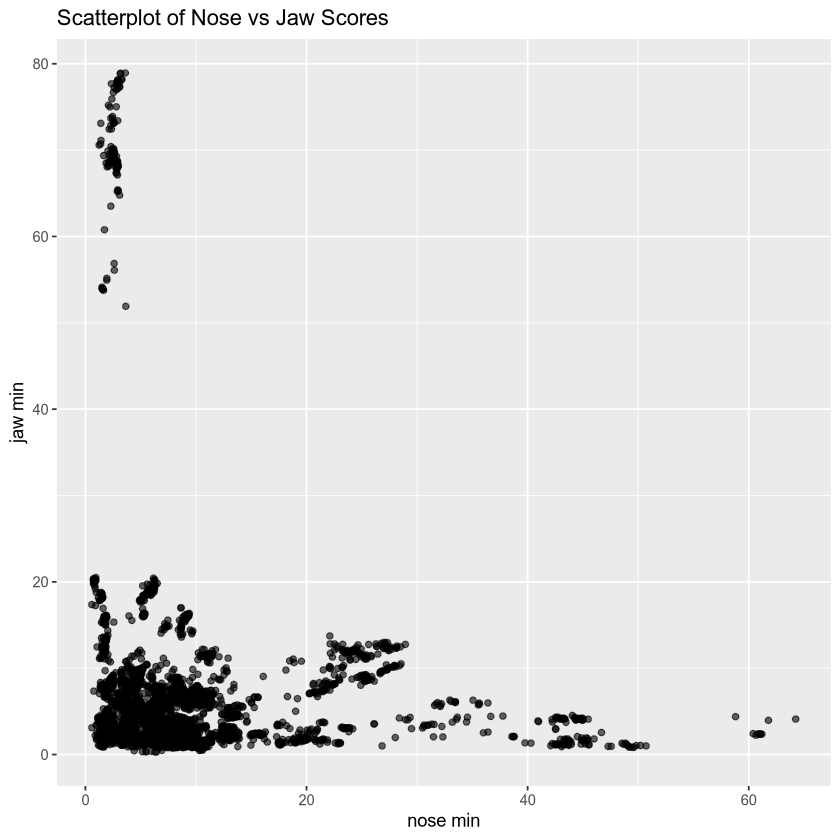

In [25]:
ggplot(df_merged, aes(x = nose_min_logp, y = jaw_min_logp)) +
  geom_point(alpha = 0.6) +
  labs(title = "Scatterplot of Nose vs Jaw Scores", x = "nose min", y = "jaw min")